# SIO113: Practice Problems
## Lecture PCA

<div class="alert alert-block alert-info"><b>Preliminaries</b>
    
- Rename this notebook using the format YourLastname_FirstInitial_PP_10. For example, <b>May_D_PP_10</b>.
    
- Answer each question in a separate cell.
</div>

**1. Image compression using the SVD**  
1. Go to Google Earth https://earth.google.com/web/ and search for a location that you find interesting. Save an image of that location by taking a screenshot (if you are using the browser) or by clicking `File > Save > Save Image` to save an image (if you are using Google Earth Pro on your computer). Make a note of the location, the data source (check the bottom bar of the Google Earth interface to find data source info), and the imagery date. Report this information in your answer. 
2. Load the image data using the `PIL` library, as we did in the Lecture notebook. 
3. Use the `image_approximation()` function from lecture to create low-rank approximations of the rgb bands of your image. Create approximations of rank `r=10`, `r=40`, and `r=120`. 
4. Plot your approximations with a title that includes the rank of the approximation and the % variability explained. 
5. Decide whether you are satisfied with your approximations - try out higher or lower rank approximations if you think it is necessary.
6. Recombine your rank `r = 120` approximated red, green, and blue bands into an RGB image and save it as a .png file.

**2. PCA Analysis on melt pond imagery data**  
1. Load in all 13 bands of Sentinel-2 data using `pd.read_csv` and store the data in a 3D array called `data_full`. 
2. Create a new array called `data` by slicing into `data_full` like so: `data_full[1400:1650,400:600,:]`. 
3. Plot the red, green, and blue bands. Include appropriate titles. 
4. Center the data by subtracting the mean from each band. 
5. Compute the covariance matrix, and its eigenvalues and eigenvectors using `np.linalg.eig()`. 
6. Create the principal components. 
7. Plot the first 3 principal components. Include appropriate titles. 
8. Do you think it will be as easy to estimate the melt pond area for this melt pond, compared to the one we analysed in the lecture? What would make it easier or more difficult? 

Rough sketch of solution:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, image
%matplotlib inline
from IPython.display import Image
import PIL as PIL

Load in data

In [3]:
filepaths = ["AOT_data.csv","b2_data.csv","b3_data.csv",\
             "b4_data.csv","b5_data.csv","b6_data.csv",\
             "b7_data.csv","b8A_data.csv","b11_data.csv",\
             "b12_data.csv","SCL_data.csv","TCI_data.csv",\
             "WVP_data.csv"]
data_full = np.zeros((np.shape(pd.read_csv(filepaths[0]))[0],np.shape(pd.read_csv(filepaths[0]))[1],13))
for k in range((len(filepaths))):
    data_full[:,:,k] = pd.read_csv(filepaths[k]).values

Trim to find other melt pond

(250, 200, 13)


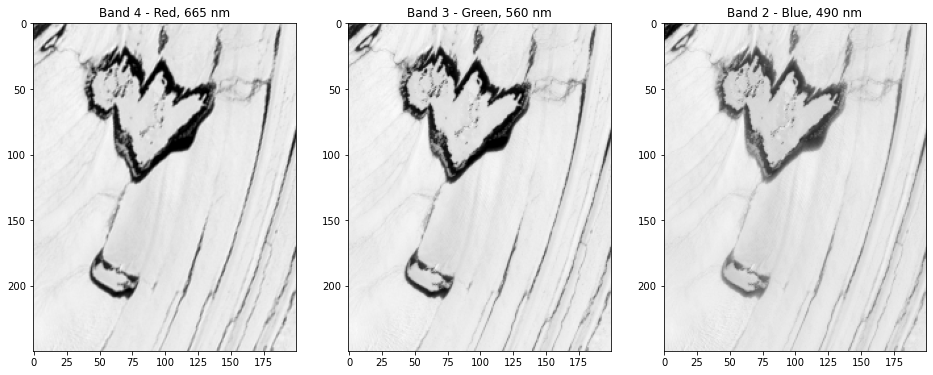

In [6]:
data = data_full[1400:1650,400:600,:]
print(data.shape)

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.imshow(data[:,:,4],cmap=cm.gray)
plt.title('Band 4 - Red, 665 nm')
plt.subplot(1,3,2)
plt.imshow(data[:,:,3],cmap=cm.gray)
plt.title('Band 3 - Green, 560 nm')
plt.subplot(1,3,3)
plt.imshow(data[:,:,2],cmap=cm.gray)
plt.title('Band 2 - Blue, 490 nm')
plt.show()

Center the data

In [8]:
for k in range((np.shape(data)[2])):
    data[:,:,k] = data[:,:,k] - np.mean(np.mean(data[:,:,k]))

Compute covariance matrix, and its eigenvalues and eigenvectors. 

In [10]:
# computing covariance matrix
C = np.zeros((np.shape(data)[2],np.shape(data)[2])) # initialize array of zeros
for i in np.arange(0,np.shape(data)[2]): 
    for j in np.arange(0,np.shape(data)[2]):
        C[i,j] = np.mean(np.mean(data[:,:,i]*data[:,:,j]))
        
# computing eigenvalues and eigenvectors
[D,V] = np.linalg.eig(C)

Create principal components

In [14]:
P = np.zeros([np.shape(data)[0],np.shape(data)[1],np.shape(data)[2]]);
for i in np.arange(0,np.shape(data)[2]):
    for j in np.arange(0,np.shape(data)[2]):
        P[:,:,j] = P[:,:,j] + V[i,j]*data[:,:,i]

Plot the first three PCs

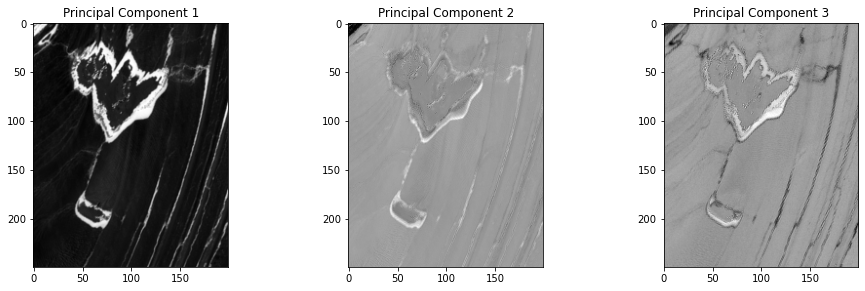

In [16]:
plt.figure(figsize=(16,26))
for i in range(3):
    plt.subplot(5,3,i+1)
    plt.imshow(P[:,:,i],cmap=cm.gray,vmin=np.min(np.min(P[:,:,i])),vmax=np.max(np.max(P[:,:,i])))
    plt.title('Principal Component ' + str(i+1))

This melt pond has ice floating on it, that would probably make it harder to estimate area. 

<div class="alert alert-block alert-danger"><b> 
To receive full credit, your notebook:
    
1. Must have the correct name;
2. Must be fully commented;
3. Must run as expected;
4. Must be submitted into Canvas before the deadline.
</b></div>